In [1]:
function accuracy()
    ac=1200;
    return ac;
end
setprecision(accuracy());

In [2]:
function order()
    M=70;
    return M+1;
end

order (generic function with 1 method)

In [3]:
function steps()
    h = BigFloat(1)/BigFloat(10)
    return h;
end

steps (generic function with 1 method)

In [4]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()
    end
    
    return S
end

multi (generic function with 1 method)

In [5]:
function multi2(Dmulti)
    S = Array{BigFloat}(undef,order()-1)
    for i in 1:order()-1
        S[i] = BigFloat(i)
    end
    return S.*Dmulti[1:end-1]
end

multi2 (generic function with 1 method)

In [6]:
"""fdot(x,y) = @. x*y
function Sumxyz(x,y)
    return sum(fdot(reverse!(x),y))
end
function Sumxyz2(x,y)
    return sum(fdot(reverse!(x),x) - fdot(reverse!(y),y))
end 
"""

"fdot(x,y) = @. x*y\nfunction Sumxyz(x,y)\n    return sum(fdot(reverse!(x),y))\nend\nfunction Sumxyz2(x,y)\n    return sum(fdot(reverse!(x),x) - fdot(reverse!(y),y))\nend \n"

In [7]:
function Sumxyz(a,b)
    return sum(reverse!(b[1:end]).*a[1:end])
end
function Sumxyz2(a,b)
    return sum(a[1:end].*reverse!(a[1:end]) .- b[1:end].*reverse!(b[1:end]))
end


Sumxyz2 (generic function with 1 method)

In [8]:
function Talor(a,b)
    for n in 1:order()-2
        a[n+2] = -(a[n] + BigFloat(2)*Sumxyz(a[1:n],b[1:n]))/BigFloat((n+1)*n)
        b[n+2] = -(b[n] + Sumxyz2(a[1:n],b[1:n]))/BigFloat((n+1)*n)
    end
    return a,b
end

Talor (generic function with 1 method)

In [9]:
function Iteration(a,b)
    
    for st in 1:Times
    
        a,b = Talor(a,b)
        
        a[1] = sum(a[1:end].*Dmulti[1:end])
        b[1] = sum(b[1:end].*Dmulti[1:end])
        a[2] = sum(a[2:end].*Dmulti2[1:end])
        b[2] = sum(b[2:end].*Dmulti2[1:end])
    
        Lorenz[st,:] = [a[1],b[1]] 
        Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
      
        if mod(st,1000) == 0
            println(st,")","Time=",convert(Float16,st*steps()),": ",Lorenzf[st,:])
        end
    end
    
    return Lorenz
    
end

Iteration (generic function with 1 method)

In [10]:
Times = 10*2000;      

a = Array{BigFloat}(undef,order())
b = Array{BigFloat}(undef,order())
Lorenz = Array{BigFloat}(undef,Times,2);
Lorenzf = Array{Float32}(undef,Times,2);
Dmulti = Array{BigFloat}(undef,1,order());
Dmulti2 = Array{BigFloat}(undef,1,order()-1);

a[1] = BigFloat(14)/BigFloat(25); 
b[1] = BigFloat(0); 
a[2] = BigFloat(0); 
b[2] = BigFloat(0); 

Dmulti = multi();
Dmulti2 = multi2(Dmulti);

In [11]:
HH = Iteration(a,b);

1000)Time=100.0: Float32[0.009642523, -0.15411629]
2000)Time=200.0: Float32[-0.15553118, 0.53518665]
3000)Time=300.0: Float32[-0.20737661, -0.123186864]
4000)Time=400.0: Float32[0.28891972, -0.31873527]
5000)Time=500.0: Float32[0.19861767, -0.23842432]
6000)Time=600.0: Float32[-0.3377564, -0.19429025]
7000)Time=700.0: Float32[-0.32497495, -0.00688757]
8000)Time=800.0: Float32[-0.57962066, -0.31119397]
9000)Time=900.0: Float32[0.36302668, -0.27725413]
10000)Time=1.0e3: Float32[-0.04915404, -0.31971648]
11000)Time=1.1e3: Float32[-0.48949727, -0.04052161]
12000)Time=1.2e3: Float32[-0.048868466, 0.7779749]
13000)Time=1.3e3: Float32[0.03097135, 0.32401255]
14000)Time=1.4e3: Float32[0.07040005, -0.46546233]
15000)Time=1.5e3: Float32[0.03489977, 0.4340817]
16000)Time=1.6e3: Float32[0.08969794, 0.27993473]
17000)Time=1.7e3: Float32[-0.04684287, 0.71324265]
18000)Time=1.8e3: Float32[0.30115086, -0.3611882]
19000)Time=1.9e3: Float32[-0.22130728, 0.26071134]
20000)Time=2.0e3: Float32[0.4437143, -

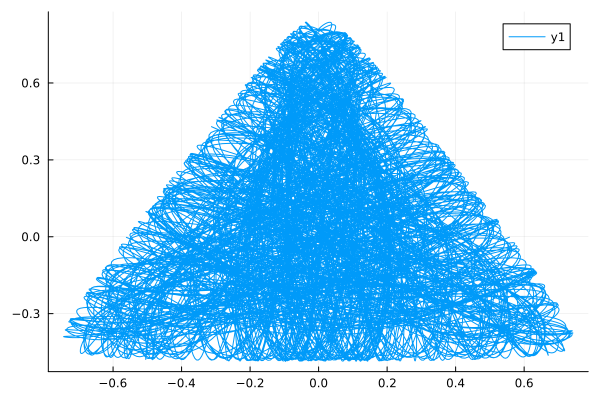

In [12]:
using Plots; 
plot(HH[1:end,1],HH[1:end,2])

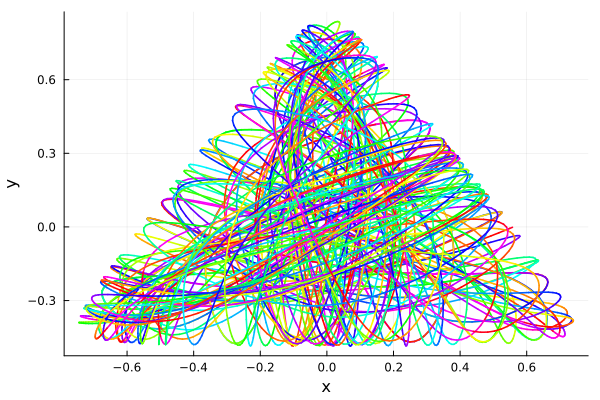

┌ Warning: Indices Base.OneTo(101) of attribute `linecolor` does not match data indices 1:7500.
└ @ Plots C:\Users\Danshi\.julia\packages\Plots\io9zQ\src\utils.jl:141


In [13]:
using Plots; 
plot(xlabel = "x", ylabel = "y")
clr = palette(:gist_rainbow)
Plots.plot!(HH[1:7500,1],HH[1:7500,2],
    linealpha = 1,
    linewidth = 1.6,
    linecolor = clr[1:end],
    legend = false
)

In [14]:
#write
function Wfile(AT,BE,Times)
#change name--------------------------------------------
    XLSX.openxlsx("CNS_HH.xlsx", mode="w") do xf
#-------------------------------------------------------
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
#change location----------------------------------------
        sheet["A1"] = "T"
        sheet["B1"] = "X"
        sheet["A2",dim=1] = AT[1:end]
        sheet["B2",dim=1] = BE[1:end]
#-------------------------------------------------------
    end
end
#-----------------------------------------------------------------------------
using XLSX
#time-----------------------------------------------------
AT=Array{Float64}(undef,Times)
for i in 1:Times
    AT[i] = i*steps()
end
#time-----------------------------------------------------
BE = HH[:,1]
#--------------------------------------------------------
Wfile(AT,BE,Times);